- iris 데이터 종 예측

In [4]:
import seaborn as sns # iris 데이터
import pandas as pd #원핫 인코딩
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [5]:
# 1. 데이터 생성 및 전처리
iris = sns.load_dataset('iris')
# 독립변수와 종속변수 분리
iris_X = iris.iloc[:, :-1].to_numpy()
iris_y = iris.iloc[:, -1]
iris_Y = pd.get_dummies(iris_y).values
# iris_Y[::50]
# 훈련셋 : 테스트셋 = 8:2
X_train, X_test, Y_train, Y_test= train_test_split(iris_X, iris_Y, test_size=.2,
                                                   stratify=iris_Y, random_state=4)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [6]:
# 층화 추출했는지 확인
pd.Series(np.argmax(Y_train, axis=1)).value_counts()

0    40
1    40
2    40
dtype: int64

In [7]:
pd.Series(np.argmax(Y_test, axis=1)).value_counts()

1    10
2    10
0    10
dtype: int64

In [8]:
# 2, 모델 구성 (입력4 - 출력3)
model = Sequential()
model.add(Dense(units=60, input_dim = 4, activation = 'relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                300       
                                                                 
 dense_1 (Dense)             (None, 50)                3050      
                                                                 
 dense_2 (Dense)             (None, 30)                1530      
                                                                 
 dense_3 (Dense)             (None, 3)                 93        
                                                                 
Total params: 4,973
Trainable params: 4,973
Non-trainable params: 0
_________________________________________________________________


In [42]:
model = Sequential([
    Input(4,),
    Dense(units=64, activation='relu'),
    Dense(units=128, activation='relu'),
    Dropout(0.2),
    Dense(units=32, activation='relu'),
    Dense(units=16, activation='relu'),
    Dropout(0.1),
    Dense(units=3, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                320       
                                                                 
 dense_14 (Dense)            (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 32)                4128      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 3)                

In [43]:
# 3. 모델학습과정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
# 4. 학습 : epoch마다 val_accuracy(val_loss, accuracy, loss) 값이 좋을 때 모델을 자동 저장 콜백 추가
    # 모델을 저장할 경로 : ./model/iris-100-val0.6521.h5
import os
model_save_folder = './model/'
if not os.path.exists(model_save_folder):
    os.mkdir(model_save_folder) # model_save_folder가 없으면 폴더 생성

# 조기종료 콜백
earlyStopping = EarlyStopping(patience=40) # monitor='val_loss' 기본값
# 모델 자동 저장 콜백
file = model_save_folder + 'iris-{epoch:03d}-val{val_accuracy:.4f}.h5'
checkpoint = ModelCheckpoint(filepath=file,
                             monitor='val_loss', # 모니터링 지표
                             save_best_only=True, # 지표가 개선된 경우만 저장. False면 매번저장
                             mode='auto', # 값이 클수록 저장. 'min'은 값이 작을수록 저장. auto
                             verbose = 1 # 저장 여부 로그 출력 (0:출력안함)
                            )

hist = model.fit(X_train, Y_train,
                 epochs=500,
                 validation_split=.2,
                 callbacks=[checkpoint, earlyStopping])

Epoch 1/500
1/3 [=========>....................] - ETA: 0s - loss: 1.0499 - accuracy: 0.3750
Epoch 1: val_loss improved from inf to 1.05574, saving model to ./model\iris-001-val0.4167.h5
3/3 [==============================] - 1s 102ms/step - loss: 1.1654 - accuracy: 0.3021 - val_loss: 1.0557 - val_accuracy: 0.4167
Epoch 2/500
1/3 [=========>....................] - ETA: 0s - loss: 1.0537 - accuracy: 0.3438
Epoch 2: val_loss improved from 1.05574 to 1.01092, saving model to ./model\iris-002-val0.4167.h5
3/3 [==============================] - 0s 35ms/step - loss: 1.0668 - accuracy: 0.3438 - val_loss: 1.0109 - val_accuracy: 0.4167
Epoch 3/500
1/3 [=========>....................] - ETA: 0s - loss: 1.0544 - accuracy: 0.3438
Epoch 3: val_loss improved from 1.01092 to 0.98409, saving model to ./model\iris-003-val0.4167.h5
3/3 [==============================] - 0s 37ms/step - loss: 1.0292 - accuracy: 0.3542 - val_loss: 0.9841 - val_accuracy: 0.4167
Epoch 4/500
1/3 [=========>...................

Epoch 27/500
1/3 [=========>....................] - ETA: 0s - loss: 0.6474 - accuracy: 0.9062
Epoch 27: val_loss improved from 0.53365 to 0.52630, saving model to ./model\iris-027-val1.0000.h5
3/3 [==============================] - 0s 34ms/step - loss: 0.6064 - accuracy: 0.9062 - val_loss: 0.5263 - val_accuracy: 1.0000
Epoch 28/500
1/3 [=========>....................] - ETA: 0s - loss: 0.5620 - accuracy: 0.8750
Epoch 28: val_loss improved from 0.52630 to 0.50981, saving model to ./model\iris-028-val1.0000.h5
3/3 [==============================] - 0s 40ms/step - loss: 0.5919 - accuracy: 0.8958 - val_loss: 0.5098 - val_accuracy: 1.0000
Epoch 29/500
1/3 [=========>....................] - ETA: 0s - loss: 0.5924 - accuracy: 0.8750
Epoch 29: val_loss improved from 0.50981 to 0.49982, saving model to ./model\iris-029-val1.0000.h5
3/3 [==============================] - 0s 40ms/step - loss: 0.6204 - accuracy: 0.8854 - val_loss: 0.4998 - val_accuracy: 1.0000
Epoch 30/500
1/3 [=========>.........

3/3 [==============================] - 0s 19ms/step - loss: 0.5263 - accuracy: 0.9062 - val_loss: 0.3726 - val_accuracy: 1.0000
Epoch 55/500
1/3 [=========>....................] - ETA: 0s - loss: 0.6476 - accuracy: 0.8750
Epoch 55: val_loss improved from 0.36262 to 0.35159, saving model to ./model\iris-055-val1.0000.h5
3/3 [==============================] - 0s 33ms/step - loss: 0.4698 - accuracy: 0.9479 - val_loss: 0.3516 - val_accuracy: 1.0000
Epoch 56/500
1/3 [=========>....................] - ETA: 0s - loss: 0.5168 - accuracy: 0.9375
Epoch 56: val_loss did not improve from 0.35159
3/3 [==============================] - 0s 19ms/step - loss: 0.4754 - accuracy: 0.9375 - val_loss: 0.3592 - val_accuracy: 1.0000
Epoch 57/500
1/3 [=========>....................] - ETA: 0s - loss: 0.5553 - accuracy: 0.9375
Epoch 57: val_loss did not improve from 0.35159
3/3 [==============================] - 0s 21ms/step - loss: 0.5042 - accuracy: 0.9271 - val_loss: 0.3954 - val_accuracy: 0.9583
Epoch 58/50

Epoch 83/500
1/3 [=========>....................] - ETA: 0s - loss: 0.4515 - accuracy: 0.9688
Epoch 83: val_loss did not improve from 0.30513
3/3 [==============================] - 0s 21ms/step - loss: 0.4288 - accuracy: 0.9583 - val_loss: 0.3215 - val_accuracy: 1.0000
Epoch 84/500
1/3 [=========>....................] - ETA: 0s - loss: 0.4672 - accuracy: 0.9062
Epoch 84: val_loss did not improve from 0.30513
3/3 [==============================] - 0s 20ms/step - loss: 0.4395 - accuracy: 0.9167 - val_loss: 0.3112 - val_accuracy: 1.0000
Epoch 85/500
1/3 [=========>....................] - ETA: 0s - loss: 0.5267 - accuracy: 0.9062
Epoch 85: val_loss did not improve from 0.30513
3/3 [==============================] - 0s 19ms/step - loss: 0.4270 - accuracy: 0.9479 - val_loss: 0.3067 - val_accuracy: 1.0000
Epoch 86/500
1/3 [=========>....................] - ETA: 0s - loss: 0.2969 - accuracy: 0.9375
Epoch 86: val_loss did not improve from 0.30513
3/3 [==============================] - 0s 17ms/s

Epoch 112/500
1/3 [=========>....................] - ETA: 0s - loss: 0.4447 - accuracy: 0.9375
Epoch 112: val_loss improved from 0.26655 to 0.26381, saving model to ./model\iris-112-val1.0000.h5
3/3 [==============================] - 0s 34ms/step - loss: 0.4208 - accuracy: 0.9479 - val_loss: 0.2638 - val_accuracy: 1.0000
Epoch 113/500
1/3 [=========>....................] - ETA: 0s - loss: 0.4679 - accuracy: 0.9062
Epoch 113: val_loss did not improve from 0.26381
3/3 [==============================] - 0s 18ms/step - loss: 0.3759 - accuracy: 0.9479 - val_loss: 0.2642 - val_accuracy: 1.0000
Epoch 114/500
1/3 [=========>....................] - ETA: 0s - loss: 0.5272 - accuracy: 0.9375
Epoch 114: val_loss did not improve from 0.26381
3/3 [==============================] - 0s 17ms/step - loss: 0.3685 - accuracy: 0.9688 - val_loss: 0.2841 - val_accuracy: 1.0000
Epoch 115/500
1/3 [=========>....................] - ETA: 0s - loss: 0.4175 - accuracy: 0.9375
Epoch 115: val_loss did not improve fr

1/3 [=========>....................] - ETA: 0s - loss: 0.3447 - accuracy: 0.9688
Epoch 140: val_loss did not improve from 0.24288
3/3 [==============================] - 0s 18ms/step - loss: 0.3270 - accuracy: 0.9583 - val_loss: 0.2459 - val_accuracy: 1.0000
Epoch 141/500
1/3 [=========>....................] - ETA: 0s - loss: 0.3331 - accuracy: 0.9375
Epoch 141: val_loss improved from 0.24288 to 0.23497, saving model to ./model\iris-141-val1.0000.h5
3/3 [==============================] - 0s 31ms/step - loss: 0.3630 - accuracy: 0.9583 - val_loss: 0.2350 - val_accuracy: 1.0000
Epoch 142/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1990 - accuracy: 1.0000
Epoch 142: val_loss did not improve from 0.23497
3/3 [==============================] - 0s 18ms/step - loss: 0.3029 - accuracy: 0.9792 - val_loss: 0.2438 - val_accuracy: 1.0000
Epoch 143/500
1/3 [=========>....................] - ETA: 0s - loss: 0.2977 - accuracy: 1.0000
Epoch 143: val_loss did not improve from 0.23497
3/3

3/3 [==============================] - 0s 18ms/step - loss: 0.2828 - accuracy: 0.9792 - val_loss: 0.2389 - val_accuracy: 1.0000
Epoch 170/500
1/3 [=========>....................] - ETA: 0s - loss: 0.3421 - accuracy: 0.9375
Epoch 170: val_loss did not improve from 0.21467
3/3 [==============================] - 0s 17ms/step - loss: 0.2697 - accuracy: 0.9688 - val_loss: 0.2197 - val_accuracy: 1.0000
Epoch 171/500
1/3 [=========>....................] - ETA: 0s - loss: 0.3293 - accuracy: 0.9688
Epoch 171: val_loss improved from 0.21467 to 0.21274, saving model to ./model\iris-171-val1.0000.h5
3/3 [==============================] - 0s 35ms/step - loss: 0.3230 - accuracy: 0.9792 - val_loss: 0.2127 - val_accuracy: 1.0000
Epoch 172/500
1/3 [=========>....................] - ETA: 0s - loss: 0.2130 - accuracy: 1.0000
Epoch 172: val_loss did not improve from 0.21274
3/3 [==============================] - 0s 18ms/step - loss: 0.3060 - accuracy: 0.9792 - val_loss: 0.2161 - val_accuracy: 1.0000
Epoch

Epoch 199/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1891 - accuracy: 1.0000
Epoch 199: val_loss improved from 0.19228 to 0.19162, saving model to ./model\iris-199-val1.0000.h5
3/3 [==============================] - 0s 33ms/step - loss: 0.2680 - accuracy: 0.9896 - val_loss: 0.1916 - val_accuracy: 1.0000
Epoch 200/500
1/3 [=========>....................] - ETA: 0s - loss: 0.2258 - accuracy: 0.9688
Epoch 200: val_loss did not improve from 0.19162
3/3 [==============================] - 0s 20ms/step - loss: 0.2618 - accuracy: 0.9792 - val_loss: 0.2167 - val_accuracy: 1.0000
Epoch 201/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1881 - accuracy: 1.0000
Epoch 201: val_loss did not improve from 0.19162
3/3 [==============================] - 0s 18ms/step - loss: 0.2729 - accuracy: 0.9688 - val_loss: 0.2055 - val_accuracy: 1.0000
Epoch 202/500
1/3 [=========>....................] - ETA: 0s - loss: 0.2330 - accuracy: 1.0000
Epoch 202: val_loss did not improve fr

3/3 [==============================] - 0s 33ms/step - loss: 0.2370 - accuracy: 0.9688 - val_loss: 0.1760 - val_accuracy: 1.0000
Epoch 229/500
1/3 [=========>....................] - ETA: 0s - loss: 0.2012 - accuracy: 1.0000
Epoch 229: val_loss did not improve from 0.17605
3/3 [==============================] - 0s 21ms/step - loss: 0.2533 - accuracy: 0.9688 - val_loss: 0.1764 - val_accuracy: 1.0000
Epoch 230/500
1/3 [=========>....................] - ETA: 0s - loss: 0.2637 - accuracy: 0.9688
Epoch 230: val_loss did not improve from 0.17605
3/3 [==============================] - 0s 17ms/step - loss: 0.2320 - accuracy: 0.9792 - val_loss: 0.1949 - val_accuracy: 1.0000
Epoch 231/500
1/3 [=========>....................] - ETA: 0s - loss: 0.2318 - accuracy: 0.9688
Epoch 231: val_loss did not improve from 0.17605
3/3 [==============================] - 0s 16ms/step - loss: 0.2446 - accuracy: 0.9688 - val_loss: 0.1771 - val_accuracy: 1.0000
Epoch 232/500
1/3 [=========>....................] - ETA

3/3 [==============================] - 0s 36ms/step - loss: 0.2045 - accuracy: 0.9896 - val_loss: 0.1632 - val_accuracy: 1.0000
Epoch 258/500
1/3 [=========>....................] - ETA: 0s - loss: 0.3170 - accuracy: 0.9688
Epoch 258: val_loss did not improve from 0.16316
3/3 [==============================] - 0s 18ms/step - loss: 0.2238 - accuracy: 0.9792 - val_loss: 0.1720 - val_accuracy: 1.0000
Epoch 259/500
1/3 [=========>....................] - ETA: 0s - loss: 0.2287 - accuracy: 0.9688
Epoch 259: val_loss did not improve from 0.16316
3/3 [==============================] - 0s 18ms/step - loss: 0.2292 - accuracy: 0.9688 - val_loss: 0.1757 - val_accuracy: 1.0000
Epoch 260/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1493 - accuracy: 0.9688
Epoch 260: val_loss improved from 0.16316 to 0.16221, saving model to ./model\iris-260-val1.0000.h5
3/3 [==============================] - 0s 33ms/step - loss: 0.2235 - accuracy: 0.9792 - val_loss: 0.1622 - val_accuracy: 1.0000
Epoch

1/3 [=========>....................] - ETA: 0s - loss: 0.1768 - accuracy: 1.0000
Epoch 286: val_loss did not improve from 0.14458
3/3 [==============================] - 0s 26ms/step - loss: 0.1914 - accuracy: 0.9896 - val_loss: 0.1584 - val_accuracy: 1.0000
Epoch 287/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1796 - accuracy: 1.0000
Epoch 287: val_loss did not improve from 0.14458
3/3 [==============================] - 0s 22ms/step - loss: 0.2162 - accuracy: 0.9688 - val_loss: 0.1474 - val_accuracy: 1.0000
Epoch 288/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1617 - accuracy: 1.0000
Epoch 288: val_loss did not improve from 0.14458
3/3 [==============================] - 0s 31ms/step - loss: 0.2012 - accuracy: 0.9792 - val_loss: 0.1509 - val_accuracy: 1.0000
Epoch 289/500
1/3 [=========>....................] - ETA: 0s - loss: 0.3493 - accuracy: 0.9375
Epoch 289: val_loss did not improve from 0.14458
3/3 [==============================] - 0s 19ms/step - 

3/3 [==============================] - 0s 16ms/step - loss: 0.2253 - accuracy: 0.9688 - val_loss: 0.1574 - val_accuracy: 1.0000
Epoch 316/500
1/3 [=========>....................] - ETA: 0s - loss: 0.2854 - accuracy: 0.9375
Epoch 316: val_loss did not improve from 0.13384
3/3 [==============================] - 0s 19ms/step - loss: 0.2003 - accuracy: 0.9792 - val_loss: 0.1456 - val_accuracy: 1.0000
Epoch 317/500
1/3 [=========>....................] - ETA: 0s - loss: 0.2227 - accuracy: 0.9688
Epoch 317: val_loss improved from 0.13384 to 0.13290, saving model to ./model\iris-317-val1.0000.h5
3/3 [==============================] - 0s 32ms/step - loss: 0.1814 - accuracy: 0.9896 - val_loss: 0.1329 - val_accuracy: 1.0000
Epoch 318/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1102 - accuracy: 1.0000
Epoch 318: val_loss improved from 0.13290 to 0.12980, saving model to ./model\iris-318-val1.0000.h5
3/3 [==============================] - 0s 34ms/step - loss: 0.1594 - accuracy: 0.9

3/3 [==============================] - 0s 18ms/step - loss: 0.1850 - accuracy: 0.9896 - val_loss: 0.1454 - val_accuracy: 1.0000
Epoch 345/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1691 - accuracy: 1.0000
Epoch 345: val_loss did not improve from 0.12631
3/3 [==============================] - 0s 18ms/step - loss: 0.1436 - accuracy: 1.0000 - val_loss: 0.1320 - val_accuracy: 1.0000
Epoch 346/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1413 - accuracy: 1.0000
Epoch 346: val_loss improved from 0.12631 to 0.12263, saving model to ./model\iris-346-val1.0000.h5
3/3 [==============================] - 0s 31ms/step - loss: 0.1831 - accuracy: 0.9688 - val_loss: 0.1226 - val_accuracy: 1.0000
Epoch 347/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1838 - accuracy: 0.9688
Epoch 347: val_loss did not improve from 0.12263
3/3 [==============================] - 0s 18ms/step - loss: 0.1873 - accuracy: 0.9792 - val_loss: 0.1277 - val_accuracy: 1.0000
Epoch

3/3 [==============================] - 0s 15ms/step - loss: 0.1505 - accuracy: 0.9896 - val_loss: 0.1228 - val_accuracy: 1.0000
Epoch 374/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1283 - accuracy: 1.0000
Epoch 374: val_loss did not improve from 0.11327
3/3 [==============================] - 0s 25ms/step - loss: 0.1510 - accuracy: 0.9896 - val_loss: 0.1188 - val_accuracy: 1.0000
Epoch 375/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1118 - accuracy: 1.0000
Epoch 375: val_loss did not improve from 0.11327
3/3 [==============================] - 0s 17ms/step - loss: 0.1493 - accuracy: 0.9896 - val_loss: 0.1187 - val_accuracy: 1.0000
Epoch 376/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1623 - accuracy: 0.9688
Epoch 376: val_loss improved from 0.11327 to 0.11160, saving model to ./model\iris-376-val1.0000.h5
3/3 [==============================] - 0s 31ms/step - loss: 0.1611 - accuracy: 0.9792 - val_loss: 0.1116 - val_accuracy: 1.0000
Epoch

Epoch 403/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1050 - accuracy: 1.0000
Epoch 403: val_loss improved from 0.10508 to 0.10440, saving model to ./model\iris-403-val1.0000.h5
3/3 [==============================] - 0s 31ms/step - loss: 0.1506 - accuracy: 0.9792 - val_loss: 0.1044 - val_accuracy: 1.0000
Epoch 404/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1659 - accuracy: 0.9688
Epoch 404: val_loss did not improve from 0.10440
3/3 [==============================] - 0s 19ms/step - loss: 0.1339 - accuracy: 0.9896 - val_loss: 0.1098 - val_accuracy: 1.0000
Epoch 405/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1511 - accuracy: 1.0000
Epoch 405: val_loss did not improve from 0.10440
3/3 [==============================] - 0s 22ms/step - loss: 0.1531 - accuracy: 0.9896 - val_loss: 0.1153 - val_accuracy: 1.0000
Epoch 406/500
1/3 [=========>....................] - ETA: 0s - loss: 0.0988 - accuracy: 1.0000
Epoch 406: val_loss did not improve fr

3/3 [==============================] - 0s 32ms/step - loss: 0.1318 - accuracy: 0.9896 - val_loss: 0.0921 - val_accuracy: 1.0000
Epoch 433/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1170 - accuracy: 1.0000
Epoch 433: val_loss did not improve from 0.09212
3/3 [==============================] - 0s 18ms/step - loss: 0.1783 - accuracy: 0.9792 - val_loss: 0.1061 - val_accuracy: 1.0000
Epoch 434/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1025 - accuracy: 1.0000
Epoch 434: val_loss did not improve from 0.09212
3/3 [==============================] - 0s 17ms/step - loss: 0.1483 - accuracy: 0.9792 - val_loss: 0.1328 - val_accuracy: 0.9583
Epoch 435/500
1/3 [=========>....................] - ETA: 0s - loss: 0.2425 - accuracy: 0.9375
Epoch 435: val_loss did not improve from 0.09212
3/3 [==============================] - 0s 18ms/step - loss: 0.1598 - accuracy: 0.9688 - val_loss: 0.1065 - val_accuracy: 1.0000
Epoch 436/500
1/3 [=========>....................] - ETA

1/3 [=========>....................] - ETA: 0s - loss: 0.1770 - accuracy: 0.9688
Epoch 462: val_loss did not improve from 0.08861
3/3 [==============================] - 0s 19ms/step - loss: 0.1230 - accuracy: 0.9792 - val_loss: 0.1074 - val_accuracy: 1.0000
Epoch 463/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1350 - accuracy: 0.9688
Epoch 463: val_loss improved from 0.08861 to 0.08659, saving model to ./model\iris-463-val1.0000.h5
3/3 [==============================] - 0s 31ms/step - loss: 0.1373 - accuracy: 0.9792 - val_loss: 0.0866 - val_accuracy: 1.0000
Epoch 464/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1251 - accuracy: 1.0000
Epoch 464: val_loss did not improve from 0.08659
3/3 [==============================] - 0s 18ms/step - loss: 0.1506 - accuracy: 0.9792 - val_loss: 0.0951 - val_accuracy: 1.0000
Epoch 465/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1843 - accuracy: 0.9688
Epoch 465: val_loss did not improve from 0.08659
3/3

Epoch 492/500
1/3 [=========>....................] - ETA: 0s - loss: 0.0666 - accuracy: 1.0000
Epoch 492: val_loss did not improve from 0.08131
3/3 [==============================] - 0s 20ms/step - loss: 0.0937 - accuracy: 0.9896 - val_loss: 0.0932 - val_accuracy: 1.0000
Epoch 493/500
1/3 [=========>....................] - ETA: 0s - loss: 0.1140 - accuracy: 0.9688
Epoch 493: val_loss did not improve from 0.08131
3/3 [==============================] - 0s 17ms/step - loss: 0.1062 - accuracy: 0.9896 - val_loss: 0.0934 - val_accuracy: 1.0000
Epoch 494/500
1/3 [=========>....................] - ETA: 0s - loss: 0.0922 - accuracy: 1.0000
Epoch 494: val_loss did not improve from 0.08131
3/3 [==============================] - 0s 18ms/step - loss: 0.1269 - accuracy: 0.9792 - val_loss: 0.0848 - val_accuracy: 1.0000
Epoch 495/500
1/3 [=========>....................] - ETA: 0s - loss: 0.2177 - accuracy: 0.9688
Epoch 495: val_loss did not improve from 0.08131
3/3 [==============================] - 0

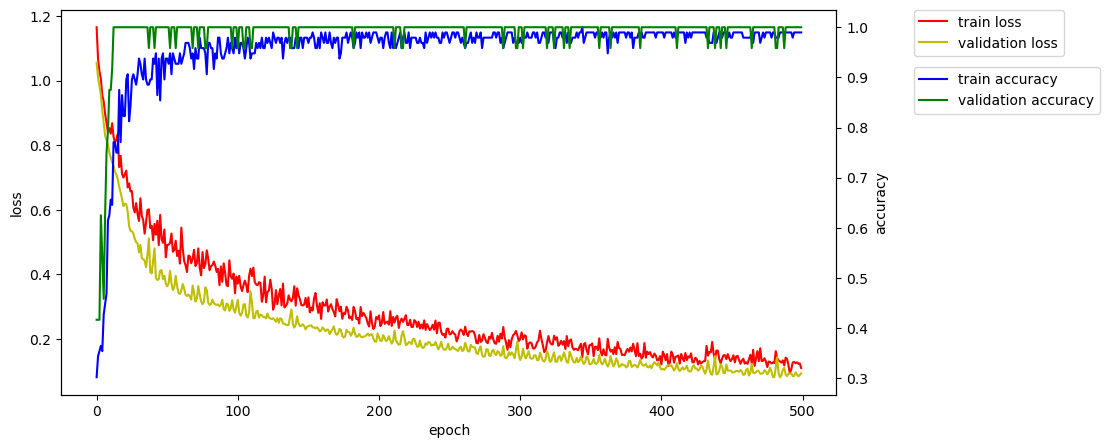

In [46]:
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)
acc_ax.legend(bbox_to_anchor=(1.1, .85), loc=2, borderaxespad=0.)
plt.show()

In [47]:
# 모델 평가
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 29ms/step - loss: 0.1835 - accuracy: 0.9333


[0.1834961324930191, 0.9333333373069763]

In [48]:
# 교차표
real = Y_test.argmax(axis=1)
pred = np.argmax(model.predict(X_test), axis=1)
real, pred

1/1 [==============================] - 0s 60ms/step


(array([1, 2, 1, 1, 0, 2, 1, 2, 2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 2,
        1, 0, 0, 1, 2, 1, 0, 1], dtype=int64),
 array([2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 2,
        1, 0, 0, 1, 2, 1, 0, 1], dtype=int64))

In [49]:
ctab = pd.crosstab(real, pred)
ctab.columns = iris['species'][::50]
ctab.columns.name = 'predict'
ctab.index = iris['species'][::50]
ctab.index.name = 'real'
ctab

predict,setosa,versicolor,virginica
real,,,
setosa,10,0,0
versicolor,0,8,2
virginica,0,0,10


In [56]:
# 저장된 모델 중 성능이 제일 좋아 보이는 것 load
from tensorflow.keras.models import load_model
model2 = load_model('model/iris1.h5')
model2.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 130ms/step - loss: 0.5188 - accuracy: 0.9667


[0.5188468098640442, 0.9666666388511658]

In [57]:
# 저장된 모델의 교차표
real = Y_test.argmax(axis=1)
pred = np.argmax(model2.predict(X_test), axis=1)
ctab = pd.crosstab(real, pred)
ctab.columns = iris['species'][::50]
ctab.columns.name = 'predict'
ctab.index = iris['species'][::50]
ctab.index.name = 'real'
ctab

1/1 [==============================] - 0s 41ms/step


predict,setosa,versicolor,virginica
real,,,
setosa,10,0,0
versicolor,0,9,1
virginica,0,0,10


In [63]:
# 모델 사용하기 (예측하기)
iris[50:52]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


In [64]:
model2.predict(np.array([[6.4, 3.2, 4.5, 1.5]]))

1/1 [==============================] - 0s 19ms/step


array([[0.06150612, 0.48908028, 0.44941363]], dtype=float32)